In [1]:
#Libraries
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [7]:
# Set dataset path
data_dir = '../data/chest_xray/'
train_dir = os.path.join(data_dir, 'train')

# Get class image lists
normal_images = os.listdir(os.path.join(train_dir, 'NORMAL'))
pneumonia_images = os.listdir(os.path.join(train_dir, 'PNEUMONIA'))

# Print counts
print(f"Number of NORMAL images: {len(normal_images)}")
print(f"Number of PNEUMONIA images: {len(pneumonia_images)}")


Number of NORMAL images: 1341
Number of PNEUMONIA images: 3875


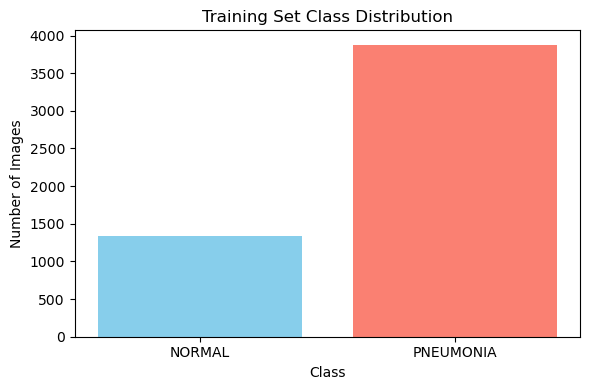

In [8]:
# Bar chart using matplotlib
labels = ['NORMAL', 'PNEUMONIA']
counts = [len(normal_images), len(pneumonia_images)]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


In [10]:
from PIL import Image
img_path = os.path.join(train_dir, 'PNEUMONIA', pneumonia_images[0])
img = Image.open(img_path)
print("Image size:", img.size)
print("Image mode:", img.mode)


Image size: (1048, 736)
Image mode: L


In [12]:
from hashlib import md5

def hash_file(path):
    with open(path, 'rb') as f:
        return md5(f.read()).hexdigest()

# Example: check all NORMAL images for duplicates
hashes = set()
for fname in normal_images:
    fpath = os.path.join(train_dir, 'NORMAL', fname)
    h = hash_file(fpath)
    if h in hashes:
        print(f"Duplicate found: {fname}")
    else:
        hashes.add(h)


Duplicate found: NORMAL2-IM-0587-0001-0001.jpeg


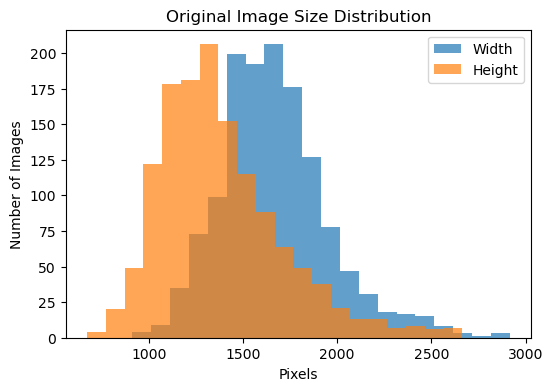

In [13]:
sizes = []
for fname in normal_images:
    fpath = os.path.join(train_dir, 'NORMAL', fname)
    with Image.open(fpath) as img:
        sizes.append(img.size)

widths, heights = zip(*sizes)
plt.figure(figsize=(6, 4))
plt.hist(widths, bins=20, alpha=0.7, label='Width')
plt.hist(heights, bins=20, alpha=0.7, label='Height')
plt.legend()
plt.title("Original Image Size Distribution")
plt.xlabel("Pixels")
plt.ylabel("Number of Images")
plt.show()


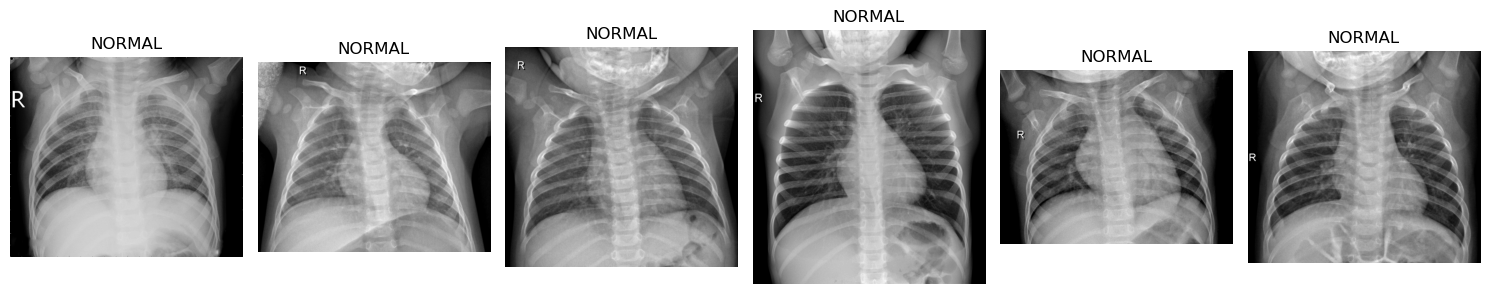

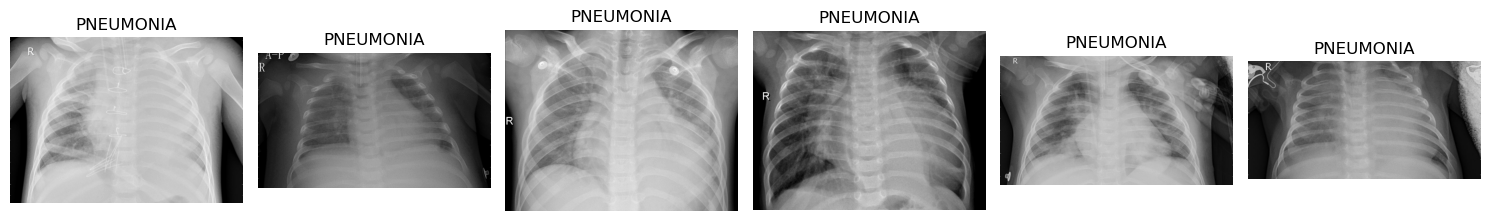

In [9]:
def show_sample_images(class_name, n=6):
    folder = os.path.join(train_dir, class_name)
    images = random.sample(os.listdir(folder), n)

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show samples
show_sample_images('NORMAL')
show_sample_images('PNEUMONIA')


We can look for texture differences, opacity and symmetry. Those are the features the CNNs learn to distinguish during training.